In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config  import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/FinalONEATTraining/Divisionbin2m4modelV1/'
npz_name = 'divisionbin2m4V1.npz'
npz_val_name = 'divisionbin2m4valV1.npz'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'divisionm4d65.h5'

In [3]:
division_categories_json = model_dir + 'DivisionCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'DivisionCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 65
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 8
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 16
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True

size_tminus = 4
size_tplus = 5
imagex = 64
imagey = 64

In [4]:
config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfiler = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=8, box_vector=6, categories=2, depth=65, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5}, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='divisionm4d65.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/FinalONEATTraining/Divisionbin2m4modelV1/', npz_name='divisionbin2m4V1.npz', npz_val_name='divisionbin2m4valV1.npz', residual=False, show=True, size_tminus=4, size_tplus=5, start_kernel=7, startfilter=48, stride=4, yolo_v0=True, yolo_v1=False, yolo_v2=False)


number of  images:	 8498
image size (3D):		 (10, 64, 64)
axes:				 STXYC
channels in / out:		 1
number of  images:	 448
image size (3D):		 (10, 64, 64)
axes:				 STXYC
channels in / out:		 1
6
(8498, 1, 1, 8) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
2021-07-03 13:17:10.968306: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-03 13:17:11.051459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:73:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-07-03 13:17:11.051777: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-07-03 13:17:11.057877: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynam

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, None, Non 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 10, None, Non 2400        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 10, None, Non 16512       input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 10, None, Non 192         time_distributed_1[0][0]         
____________________________________________________________________________________________

Train on 8498 samples, validate on 448 samples
Epoch 1/250


2021-07-03 13:17:44.224730: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-07-03 13:17:45.707472: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


8498/8498 [==============================] - 1172s 138ms/step - loss: 2.2012 - accuracy: 0.7576 - val_loss: 1.9925 - val_accuracy: 0.9152

Epoch 00001: saving model to /home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV1/divisionm4d65.h5


<Figure size 432x288 with 0 Axes>

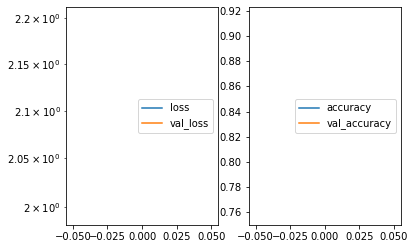

Predicted cell: Division Probability: [[0.588424]]
True Cell type: Division
x [[0.50509655]]
True positional value x 0.5
y [[0.49885127]]
True positional value y 0.5
t [[0.4489029]]
True positional value t 0.4444444444444444
h [[0.35672107]]
True positional value h 0.390625
w [[0.37274924]]
True positional value w 0.359375
c [[0.52338713]]
True positional value c 1.0


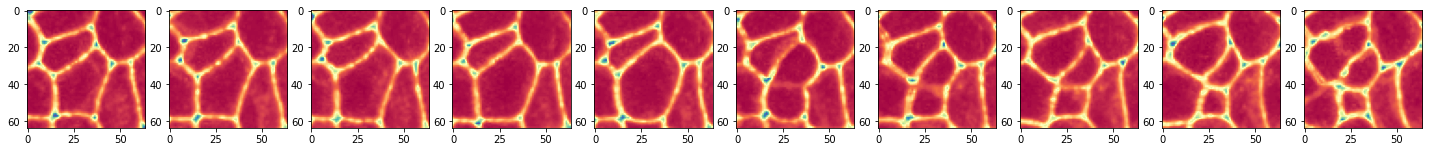

Epoch 2/250
8498/8498 [==============================] - 1154s 136ms/step - loss: 1.8918 - accuracy: 0.9632 - val_loss: 2.0232 - val_accuracy: 0.9152

Epoch 00002: saving model to /home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV1/divisionm4d65.h5


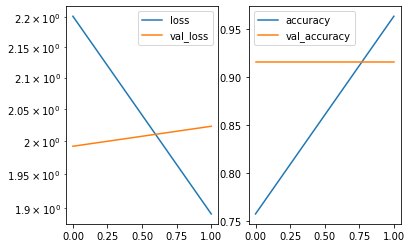

Predicted cell: Division Probability: [[0.9998029]]
True Cell type: Division
x [[0.49375698]]
True positional value x 0.5
y [[0.51088876]]
True positional value y 0.5
t [[0.4373865]]
True positional value t 0.4444444444444444
h [[0.26002592]]
True positional value h 0.171875
w [[0.3072607]]
True positional value w 0.21875
c [[0.50119203]]
True positional value c 1.0


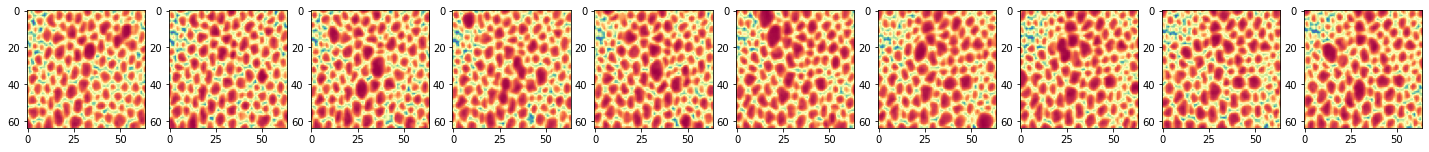

Epoch 3/250
8498/8498 [==============================] - 1155s 136ms/step - loss: 1.8458 - accuracy: 0.9755 - val_loss: 1.8481 - val_accuracy: 0.9665

Epoch 00003: saving model to /home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV1/divisionm4d65.h5


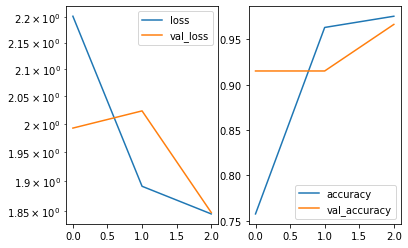

Predicted cell: Normal Probability: [[0.9999875]]
True Cell type: Normal
x [[0.5072808]]
True positional value x 0.5
y [[0.50333756]]
True positional value y 0.5
t [[0.42939627]]
True positional value t 0.4444444444444444
h [[0.27725175]]
True positional value h 0.375
w [[0.2867284]]
True positional value w 0.375
c [[0.47504237]]
True positional value c 1.0


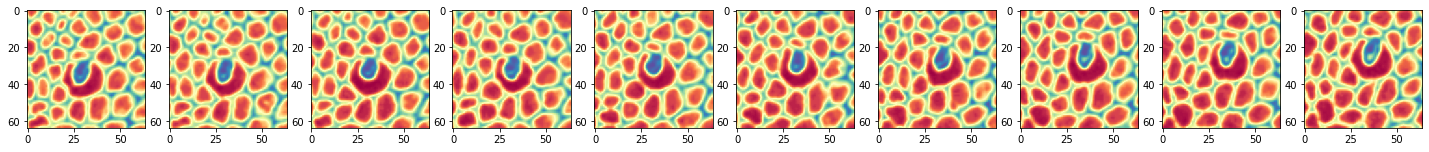

Epoch 4/250
2432/8498 [=======>......................] - ETA: 13:30 - loss: 1.8149 - accuracy: 0.9856

In [ ]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()
